### This notebook contain solutions to assignment 2 

Task 1: Data preparation

Activity
- Load the dataset
- perform data preprocessing

In [19]:
# import pandas, matplotlib, seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# load the dataset

data = pd.read_excel(r'omdena2.xlsx')

In [5]:
# display first few rows of the dataset

data.head()

,Age,Weight(kg),Height(cm),Systolic BP,BMI,Overweight
0,13,43.0,157,118.0,17.4,No
1,14,46.0,159,111.0,18.2,No
2,10,33.0,132,94.0,19.2,YES
3,19,65.0,168,126.0,23.1,No
4,12,31.0,151,87.0,13.8,No


In [6]:
# display information about the variables

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1229 entries, 0 to 1228
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1229 non-null   int64  
 1   Weight(kg)   1229 non-null   float64
 2   Height(cm)   1229 non-null   int64  
 3   Systolic BP  1224 non-null   float64
 4   BMI          1229 non-null   float64
 5   Overweight   1229 non-null   object 
dtypes: float64(3), int64(2), object(1)
memory usage: 57.7+ KB


From the output cell above, we have 5 continuous variabels (independent) and one categorical dependent variable (overweight) 

In [7]:
# check if there are missing values

data.isna().sum()

Age            0
Weight(kg)     0
Height(cm)     0
Systolic BP    5
BMI            0
Overweight     0
dtype: int64

The output cell above indicate presence of five missing values in the variable systolic BP.

In [8]:
# check the shape of the dataset

data.shape

(1229, 6)

We have 1229 rows of data, hence i will drop rows with null values.

In [9]:
# drop null values

data = data.dropna(subset='Systolic BP')

In [10]:
# check that no null value exist in the data now

data.isnull().sum()

Age            0
Weight(kg)     0
Height(cm)     0
Systolic BP    0
BMI            0
Overweight     0
dtype: int64

Perfect!!

In [11]:
# explore the dependent variable

data['Overweight'].unique()

array(['No', 'YES'], dtype=object)

Since our independent variable is categorical, we need to perform variable encoding which will assign 0 to No and 1 to YES

In [12]:
# import the label encoder from scikit learn

from sklearn.preprocessing import LabelEncoder

In [13]:
# initialize the label encoder

labeller = LabelEncoder()

In [14]:
# perform label encoding on the variable (overweight)

data['Overweight'] = labeller.fit_transform(data['Overweight'])

In [15]:
# display first few rows to see the changes

data.head()

,Age,Weight(kg),Height(cm),Systolic BP,BMI,Overweight
0,13,43.0,157,118.0,17.4,0
1,14,46.0,159,111.0,18.2,0
2,10,33.0,132,94.0,19.2,1
3,19,65.0,168,126.0,23.1,0
4,12,31.0,151,87.0,13.8,0


As observed above, the column overweight now has just ones for YES and zeros for No

In [18]:
# let's explore the overweight variable further
# count the number of each category

data['Overweight'].value_counts()

Overweight
0    905
1    319
Name: count, dtype: int64

<Axes: xlabel='Overweight', ylabel='count'>

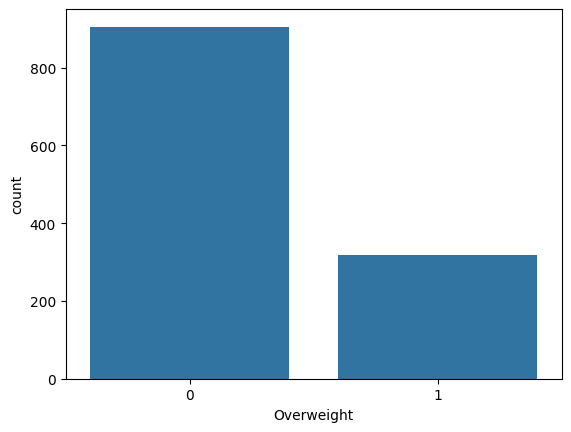

In [25]:
# visualize this on a graph

sns.countplot(x=data['Overweight'], data=data)

Now, let's divide the data into  response variable and feature variables

In [26]:
# separate the data into features and response variables

X = data.drop('Overweight', axis=1)
y = data['Overweight']

In [27]:
# train and test splitting of data

# first import the train test split

from sklearn.model_selection import train_test_split

# split the data into train, and test in the ratio 0.8:0.2

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42 )

In [28]:
# next, we scale our data to optimized scaling
# first import the standardscaler from scikit learn

from sklearn.preprocessing import StandardScaler

# initialize the standard scaler

sc = StandardScaler()

# fit and transform the data with the standard scaler

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [29]:
# let's have a look of the scaled data

X_train[:10]

array([[-0.41525684,  1.15517598, -0.0704567 , -0.26477152,  0.65525259],
       [-1.49791049, -1.97298147, -0.83887795, -1.59201839, -0.71201029],
       [-1.49791049, -1.760903  , -0.7936767 , -0.86203261, -0.58595531],
       [-1.49791049, -0.17031447, -0.11565795,  1.32792473, -0.03430736],
       [-0.41525684,  1.86210422,  0.15554955,  0.13340255,  0.84331439],
       [ 0.12606999,  0.80171186,  0.8335683 , -0.72930792, -0.21185612],
       [-0.95658366, -0.08194844, -0.5224692 , -0.92839495,  0.3292788 ],
       [ 2.29137728,  0.3156987 ,  0.4719583 ,  1.19520004, -0.21030891],
       [ 1.75005046,  0.80171186,  0.33635455, -0.59658323,  0.14121699],
       [ 1.75005046,  0.6249798 ,  0.15554955,  0.53157661,  0.17882935]])

### Task 1: Supervised machine learning

Part 1
- Choose a supervised learning algorithm and test it on the data

 Random forest classifier

In [31]:
# first import the randomforest classifier

from sklearn.ensemble import RandomForestClassifier

In [32]:
# initialize the classifier

rfc = RandomForestClassifier()

In [33]:
# train the data using the classifier

rfc.fit(X_train, y_train)

RandomForestClassifier()

In [34]:
# predict using X_test

pred_rfc = rfc.predict(X_test)

Part B
- Evaluate the performance of the trained model.

In [39]:
# let's see how well our model performs
# first import the classification report

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# print the classification report

print(classification_report(y_test, pred_rfc))

# print the accuracy

print('accuracy', accuracy_score(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       183
           1       0.97      0.92      0.94        62

    accuracy                           0.97       245
   macro avg       0.97      0.95      0.96       245
weighted avg       0.97      0.97      0.97       245

accuracy 0.9714285714285714


For the random forest classifier, we have an accuracy score of 0.97

Part C: 
- Compare the performance of at least two different supervised learning algorithms on the same dataset.

1. Decision tree classifier

In [40]:
# import the decision tree classifier

from sklearn.tree import DecisionTreeClassifier

# initialize the classifier

dtc = DecisionTreeClassifier()

# fit the data into the classifier

dtc.fit(X_train, y_train)

# make predictions on the testing set

pred_dtc = dtc.predict(X_test)


In [41]:
# evaluate the performance

print(classification_report(y_test, pred_dtc))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       183
           1       0.93      0.92      0.93        62

    accuracy                           0.96       245
   macro avg       0.95      0.95      0.95       245
weighted avg       0.96      0.96      0.96       245



2. Support vector machine SVM classifier

In [42]:
# import the SVM classifier

from sklearn.svm import SVC

# initialize the classifier

svc = SVC()

# fit the data into the classifier

svc.fit(X_train, y_train)

# make predictions on the testing set

pred_svc = svc.predict(X_test)


In [43]:
# evaluate the performance

print(classification_report(y_test, pred_svc))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       183
           1       1.00      0.87      0.93        62

    accuracy                           0.97       245
   macro avg       0.98      0.94      0.95       245
weighted avg       0.97      0.97      0.97       245



The SVM classifier has an accuracy of 0.97 while the accuracy for the decision tree is 0.96. The SVM classifier predicts with a precision of 0.96 for category 0 and 1 for category 1 meanwhile the Decision tree predicts with a precision of 0.97 and 0.93 for category 0 and 1 respectively. Hence, the SVM is slightly a better model in this scenario

### Task 3: Unsupervised Learning

Part A:
-  Apply an unsupervised learning algorithm (e.g., K-Means Clustering or Hierarchical Clustering) to identify patterns or clusters in the dataset.

K-Means clustering

In [74]:
# load the data

df = pd.read_excel(r'omdena2.xlsx')

In [75]:
# drop any null values

df = df.dropna()

In [76]:
# ensure no missing values

df.isna().sum()

Age            0
Weight(kg)     0
Height(cm)     0
Systolic BP    0
BMI            0
Overweight     0
dtype: int64

In [77]:
# display head of data

df.head()

,Age,Weight(kg),Height(cm),Systolic BP,BMI,Overweight
0,13,43.0,157,118.0,17.4,No
1,14,46.0,159,111.0,18.2,No
2,10,33.0,132,94.0,19.2,YES
3,19,65.0,168,126.0,23.1,No
4,12,31.0,151,87.0,13.8,No


I will cluster this data based on BMI and Weight

In [78]:
# subset the required columns for clustering

df = df[['BMI', 'Weight(kg)']]
df

,BMI,Weight(kg)
0,17.400000,43.0
1,18.200000,46.0
2,19.200000,33.0
3,23.100000,65.0
4,13.800000,31.0
...,...,...
1224,18.696581,45.5
1225,21.300000,57.0
1226,21.631149,54.0
1227,19.900000,47.0


In [79]:
# here i will use a minmax scaler
# import the minmax scaler

from sklearn.preprocessing import MinMaxScaler

# initialize the scaler

scaler = MinMaxScaler()

# fit and transform the data using scaler

df = scaler.fit_transform(df)

<Axes: xlabel='Weight(kg)', ylabel='BMI'>

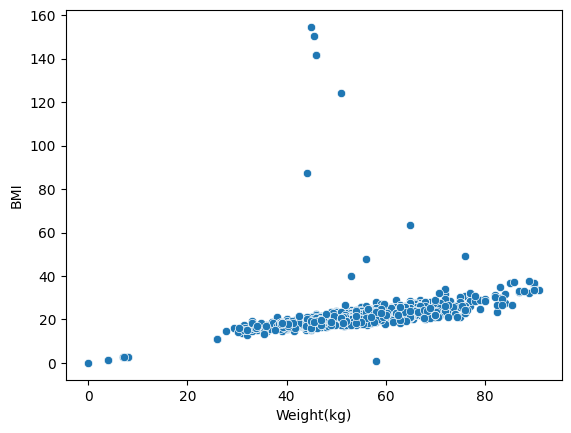

In [62]:
# visualize the data to observe the data

sns.scatterplot(x=data['Weight(kg)'], y=data['BMI'])

From the output cell above, the best k for a starting point in our kmeans model could be 3.

In [83]:
# import the k-means clustering model

from sklearn.cluster import KMeans

# initialize the model

km = KMeans(n_clusters = 3)

# predict possible clusters

y_predicted = km.fit_predict(df)

# print the predicted clusters

y_predicted

array([1, 1, 1, ..., 2, 1, 0])

Part B: Visualize the clusters and interpret the results.

In [84]:
# display the centroids of all clusters

print(km.cluster_centers_)

[[0.16521805 0.76482277]
 [0.11399643 0.44775864]
 [0.14408267 0.59901448]]


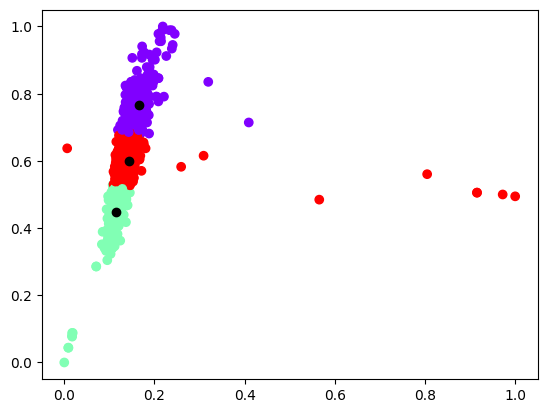

In [94]:
# plot the clusters along side the centriods

plt.scatter(df[:,0], df[:,1], c=km.labels_, cmap='rainbow')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='black')

Starting with three clusters was due to the initial visual of the data. Now, let's use the elbow plot to identify the best possible value for k

This works by running several values of k and calculating the sum of squared (SSE) errors for each value of k 

In [95]:
# here is the elbow technique for finding k

# first, lets try k ranging from 1-10

krange = range(1,11)

# initialize an array to store different SSE for each k

sse = []

# write a loop to run over each krange

for k in krange:
    km = KMeans(n_clusters=k) # this line initializes a new model with k clusters
    km.fit(df) # this line fits the kmeans model
    sse.append(km.inertia_) # this lines returns the SSE using km.inertia_ and appends the value in the sse array for each k

# print out the sse values generated

sse



[23.490938161520546,
 11.959438884321116,
 8.772410374861744,
 6.820125435056468,
 3.667491621271089,
 2.7518366191792003,
 1.8653046843906438,
 1.4610697657799951,
 1.2261322833725634,
 1.0415549432178164]

Text(0, 0.5, 'SSE')

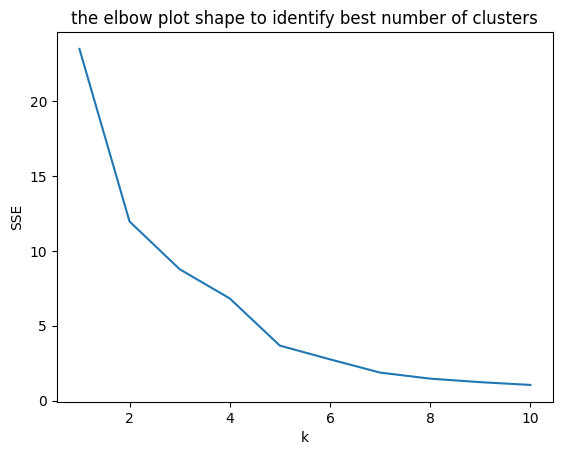

In [98]:
# plot the sse to obtain an elbow like chart from where the best k is detected
plt.plot(krange, sse)
plt.title('the elbow plot shape to identify best number of clusters')
plt.xlabel('k') #label the x axis
plt.ylabel('SSE') # label the y axis

From the chart above, the best possible k for the data is 5.

Now let's refit the model with k as 5

In [99]:
# initialize the model

km = KMeans(n_clusters = 5)

# predict possible clusters

y_predicted = km.fit_predict(df)

# print the predicted clusters

y_predicted

array([0, 4, 0, ..., 4, 4, 3])

In [100]:
# display the centroids of all 5 clusters

print(km.cluster_centers_)

[[0.11122306 0.43048386]
 [0.151616   0.69129682]
 [0.86220197 0.50842491]
 [0.18425953 0.85554199]
 [0.13236391 0.56871001]]


Text(0, 0.5, 'weight')

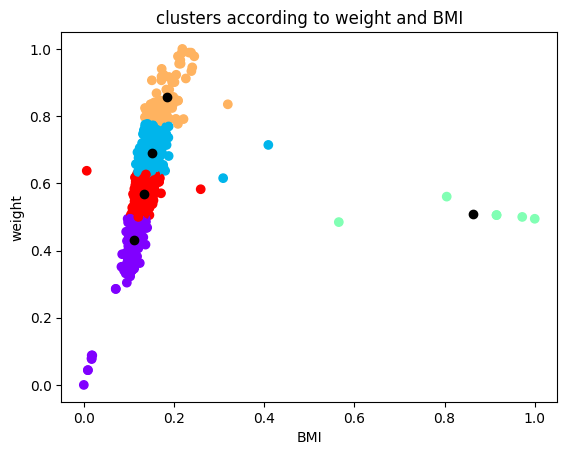

In [102]:
# plot the clusters along side the centriods

plt.scatter(df[:,0], df[:,1], c=km.labels_, cmap='rainbow')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='black')
plt.title('clusters according to weight and BMI')
plt.xlabel('BMI')
plt.ylabel('weight')

Part C: Discuss the advantages and limitations of using unsupervised learning in this scenario.

In this particular scenario, unsupervised learning is advantages because we donot have an outcome variable and all we can achieve is to identify patterns in the data and group them together. This method is however limited because the results have very little precision and accuracy. 

### Task 4: Application in Predictive Analytics: Customer churn prediction

Activity
- Choose one predictive analytics application (e.g., sales forecasting or customer churn prediction).
- Build a machine learning model to address the chosen application.
- Evaluate the model's performance and discuss the practical implications.


In [178]:
#load the dataset

data = pd.read_csv(r'Telco-Customer-Churn.csv')

In [179]:
# display the first few rows

data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [141]:
# display shape of the data

data.shape

(7043, 21)

data has 21 columns and 7043 rows

In [180]:
# display all the column info

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [181]:
# I will work with just a few columns choosen at random

data = data[['SeniorCitizen','Partner', 'tenure', 'PhoneService', 'PaperlessBilling','MonthlyCharges','Churn' ]]

In [182]:
# display columns and store it in a list.
columns = data.columns
columns = columns.tolist()
print(type(columns))

<class 'list'>


In [183]:
# display value counts for each variable

for i in columns:
    print(data[i].value_counts())
    print('----------------------------')


SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64
----------------------------
Partner
No     3641
Yes    3402
Name: count, dtype: int64
----------------------------
tenure
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: count, Length: 73, dtype: int64
----------------------------
PhoneService
Yes    6361
No      682
Name: count, dtype: int64
----------------------------
PaperlessBilling
Yes    4171
No     2872
Name: count, dtype: int64
----------------------------
MonthlyCharges
20.05     61
19.85     45
19.95     44
19.90     44
20.00     43
          ..
23.65      1
114.70     1
43.65      1
87.80      1
78.70      1
Name: count, Length: 1585, dtype: int64
----------------------------
Churn
No     5174
Yes    1869
Name: count, dtype: int64
----------------------------


In [184]:
# explore the target variable further to check for balance

data.Churn.value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

<Axes: xlabel='Churn', ylabel='count'>

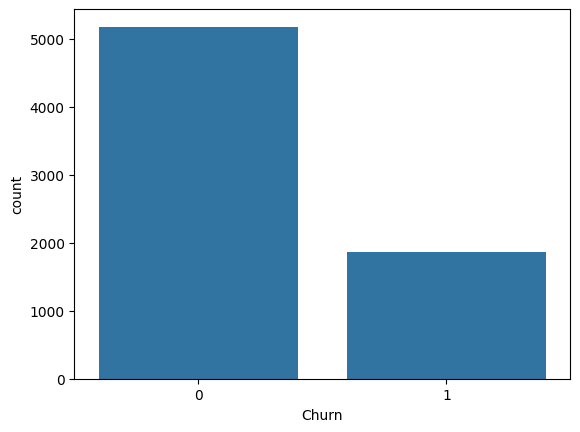

In [171]:
# visualize this on a plot

sns.countplot(x=data['Churn'])

In [185]:
# encode categorical data using the labelencoder
# initialize the encoder

lb = LabelEncoder()

# perform label encoding

data['Partner'] = lb.fit_transform(data['Partner'])
data['PhoneService'] = lb.fit_transform(data['PhoneService'])
data['PaperlessBilling'] = lb.fit_transform(data['PaperlessBilling'])
data['Churn'] = lb.fit_transform(data['Churn'])


In [186]:
data

,SeniorCitizen,Partner,tenure,PhoneService,PaperlessBilling,MonthlyCharges,Churn
0,0,1,1,0,1,29.85,0
1,0,0,34,1,0,56.95,0
2,0,0,2,1,1,53.85,1
3,0,0,45,0,0,42.30,0
4,0,0,2,1,1,70.70,1
...,...,...,...,...,...,...,...
7038,0,1,24,1,1,84.80,0
7039,0,1,72,1,1,103.20,0
7040,0,1,11,0,1,29.60,0
7041,1,1,4,1,1,74.40,1


In [187]:
# separate data to features and target

X = data.drop('Churn', axis=1)
y = data['Churn']

In [188]:
# divide set to train and test

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=10)

Model building using a decison tree

In [189]:
# initial decision tree classifier
dt = DecisionTreeClassifier()

# fit the model
dt.fit(X_train, y_train)

# use model for prediction
prediction = dt.predict(X_test)

In [195]:
# evaluate performance matrix
from sklearn.metrics import recall_score, precision_score, f1_score,accuracy_score

# print the performance matrix

def decisiontree():
    print("Accuracy:", "%.3f" % accuracy_score(y_test, prediction))
    print("Precision:", "%.3f" % precision_score(y_test, prediction))
    print("Recall:", "%.3f" % recall_score(y_test, prediction))
    print("F1 Score:", "%.3f" % f1_score(y_test, prediction))

In [196]:
# print the performance matrix
decisiontree()

Accuracy: 0.750
Precision: 0.488
Recall: 0.528
F1 Score: 0.507


The model has an accuracy of 75% with a precision of 0.488

Bonus Task 

Implement an additional machine learning algorithm of your choice and compare its performance with the existing models.

Naive bayes model

In [191]:
# import the model

from sklearn.naive_bayes import GaussianNB

In [192]:
# initialize the model

gnb = GaussianNB()

# fit the model

gnb.fit(X_train, y_train)

# predict

ypred = gnb.predict(X_test)

In [199]:
# print the performance matrix
def naivebayes():
    print("Accuracy:", "%.3f" % accuracy_score(y_test, ypred))
    print("Precision:", "%.3f" % precision_score(y_test, ypred))
    print("Recall:", "%.3f" % recall_score(y_test, ypred))
    print("F1 Score:", "%.3f" % f1_score(y_test, ypred))
    
naivebayes()

Accuracy: 0.764
Precision: 0.517
Recall: 0.481
F1 Score: 0.498


In [202]:
# compare the 2 models

print('Decision tree performance')
decisiontree()
print('_______________')
print('Naive bayes performance')
naivebayes()

Decision tree performance
Accuracy: 0.750
Precision: 0.488
Recall: 0.528
F1 Score: 0.507
_______________
Naive bayes performance
Accuracy: 0.764
Precision: 0.517
Recall: 0.481
F1 Score: 0.498


As observed above, naive bayes has a slightly higher precision than decision tree classifier